# estimating pi with the monte carlo method

### method:
we can approximate by by using randomization and the ratio of areas. by choosing an object of known area, in this case a unit square, we can calculate pi using the fact that 
$$\frac{\text{number of points in circle}}{\text{total number of points}} \approx \frac{A_{\text{quarter circle}}}{A_{\text{unit square}}}.$$
Because we know that the area of the quarter circle is $$A_{\text{quarter circle}} = \frac{\pi*r^2}{4}$$
we can approximate pi as 
$$ \pi \approx \frac{4*\text{points in circle}}{r^2 * \text{total points}}.$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['lines.color'] = 'r'
plt.rcParams["font.size"] = "20"

def make_quarter_circle(radius):
    x = np.arange(0,radius, .001)
    y = np.sqrt(radius**2-x**2)
    return x,y

def approx_pi_graphical(iterations, radius):
    x, y = make_quarter_circle(radius)
    plt.plot(x,y, 'lime')
    num_iterations = iterations
    num_in_circle = 0
    num_out_circle = 0
    for i in range(num_iterations):
        x_val, y_val = np.random.uniform(low=0, high=radius), np.random.uniform(low=0, high=radius)
        if np.sqrt(x_val**2 + y_val**2) <= radius:
            num_in_circle += 1
            plt.plot(x_val, y_val, 'm.', alpha=.5)
        else:
            num_out_circle += 1
            plt.plot(x_val, y_val, 'k.', alpha=.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Approximating Pi Numerically')
    area_ratio = num_in_circle / num_iterations
    pi_approx = 4*radius**2*area_ratio / radius**2
    plt.text(radius/10, radius/10, 'pi approximation = {:.4f}'.format(pi_approx), style='italic',
            bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    plt.show()
    return pi_approx

def approx_pi_non_graphical(iterations, radius):
    num_in_circle = 0
    num_out_circle = 0
    for i in range(iterations):
        x_val, y_val = np.random.uniform(low=0, high=radius), np.random.uniform(low=0, high=radius)
        if np.sqrt(x_val**2 + y_val**2) <= radius:
            num_in_circle += 1
        else:
            num_out_circle += 1
    area_ratio = num_in_circle / iterations
    return 4*radius**2*area_ratio / radius**2

def moving_average(data, window) :
    res = np.cumsum(data, dtype=float)
    res[window:] = res[window:] - res[:-window]
    return res[window - 1:] / window
    

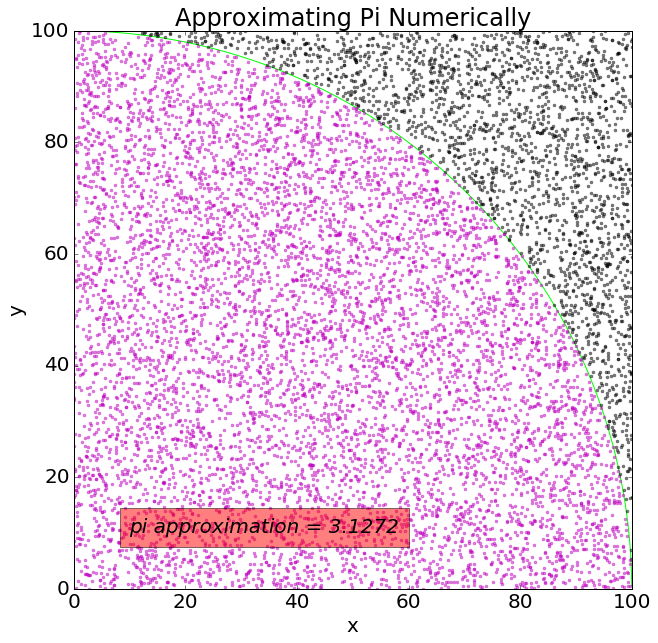

In [3]:
radius = 100
iterations = 10000
pi = approx_pi_graphical(iterations, radius)

In [4]:
iterations_non_graphical = np.arange(100,10000,1)
radius = 100
percent_error = []
for iteration_count in iterations_non_graphical:
    if iteration_count % 1000 == 0:
        print('approximating pi with {} random data points'.format(iteration_count))
    temp_result = approx_pi_non_graphical(iteration_count, radius)
    percent_error.append(abs(np.pi - temp_result)/np.pi)

approximating pi with 1000 random data points
approximating pi with 2000 random data points
approximating pi with 3000 random data points
approximating pi with 4000 random data points
approximating pi with 5000 random data points
approximating pi with 6000 random data points
approximating pi with 7000 random data points
approximating pi with 8000 random data points
approximating pi with 9000 random data points


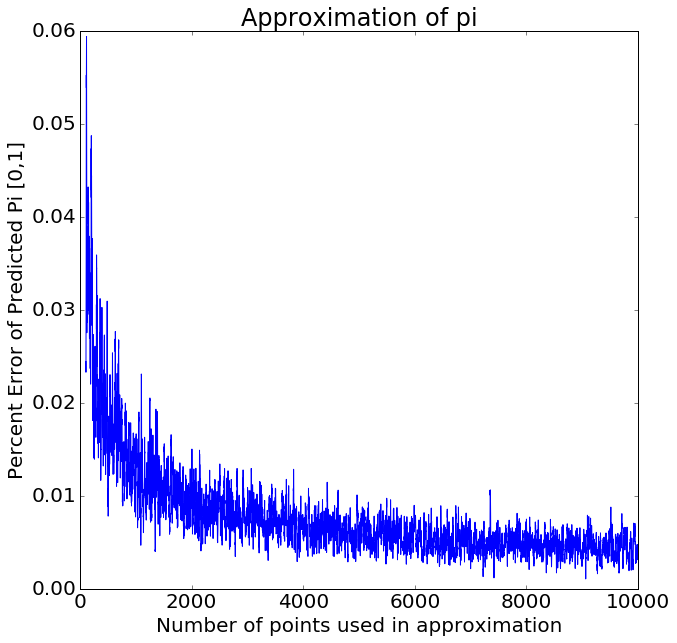

In [10]:
# plt.plot(iterations_non_graphical, percent_error)
iters, error = moving_average(iterations_non_graphical, 10), moving_average(percent_error, 10)
plt.plot(iters, error)
plt.xlabel('Number of points used in approximation')
plt.ylabel('Percent Error of Predicted Pi [0,1]')
plt.title('Approximation of pi')
plt.show()